Imports

In [9]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf
import yfinance as yfin

yfin.pdr_override()


Function that saves stock data to CSV

In [10]:
def save_to_csv_from_yahoo(ticker,syear,smonth,sday,eyear,emonth,eday):
    start = dt.datetime(syear,smonth,sday)
    end = dt.datetime(eyear,emonth,eday)

    df = web.get_data_yahoo(ticker, start, end)
    #df['Date'] = df.index # If not using data from CSV
    df.to_csv('/Users/janag/OneDrive/Work/quant-soup/Python_for_Finance/' + ticker + '.csv')

    return df

save_to_csv_from_yahoo('AMZN',2022,1,1,2023,1,1)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000
...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600


Function that returns a dataframe from CSV

In [11]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv('/Users/janag/OneDrive/Work/quant-soup/Python_for_Finance/' + ticker + '.csv')
    except FileNotFoundError:
        print("File doesn't exist")
    else:
        return df
    
AMZN = get_df_from_csv('AMZN')

Add daily return to dataframe

Simple rate of return = (End price - Start price) / Start price
                      = EP/BP - 1

In [12]:
def add_daily_return_to_df(df, ticker):
    df['Daily Returns'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv('/Users/janag/OneDrive/Work/quant-soup/Python_for_Finance/' + ticker + '.csv')
    return df

add_daily_return_to_df(AMZN, 'AMZN')

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,NaN
1,2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,-0.016916
2,2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,-0.018893
3,2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000,-0.006711
4,2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000,-0.004288
...,...,...,...,...,...,...,...,...
246,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,0.017425
247,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,-0.025924
248,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,-0.014692
249,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900,0.028844


Returns total return over time

In [13]:
def get_return_defined_time(df,syear,smonth,sday,eyear,emonth,eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    daily_ret = df.loc[mask]['Daily Returns'].mean()
    df2 = df.loc[mask]
    days = df2.shape[0]

    return (days * daily_ret)

tot_ret = get_return_defined_time(AMZN,2022,1,1,2023,1,1)
tot_ret

-0.26630297592469176

Matplotlib Finance

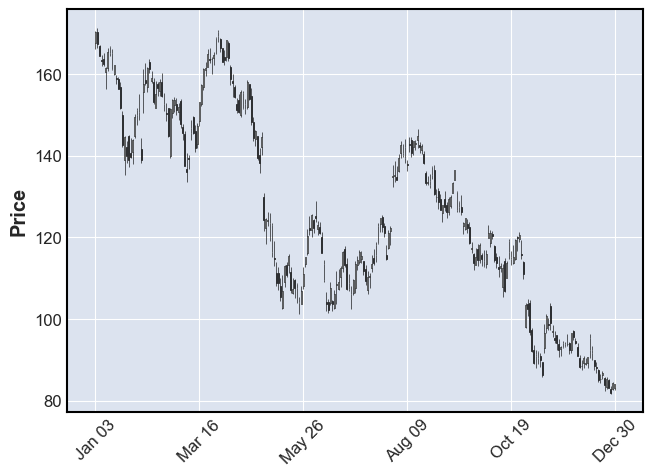

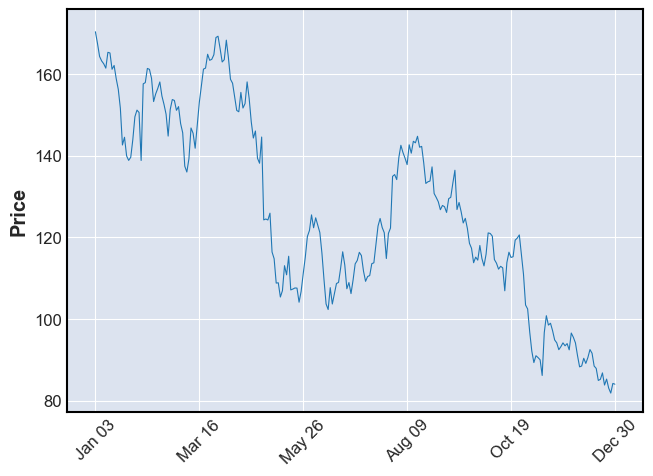

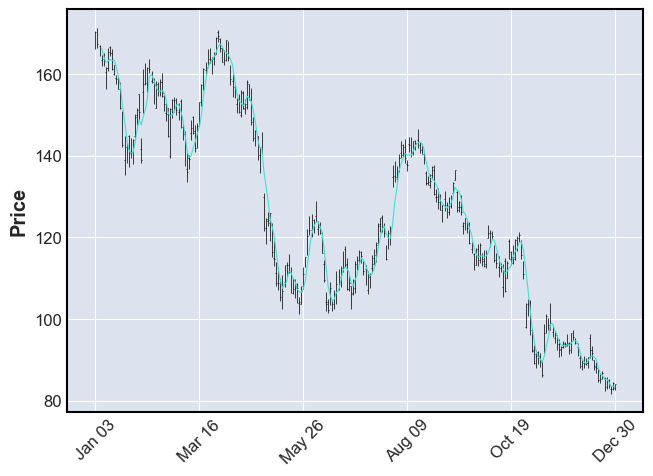

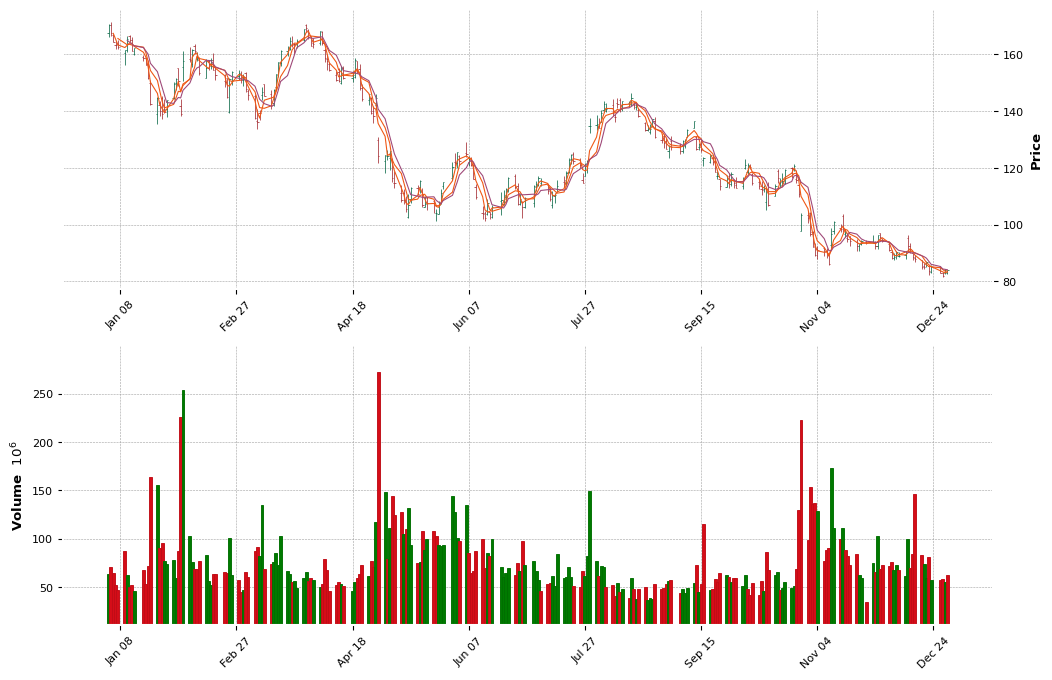

In [15]:
def mplfinance_plot(ticker,chart_type,syear,smonth,sday,eyear,emonth,eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    try:
        df = pd.read_csv('C:/Users/janag/OneDrive/Work/quant-soup/Python_for_Finance/' + ticker + '.csv')
    except FileNotFoundError:
        print("File doesn't exist")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]

        mpf.plot(df_sub, type='candle')
        mpf.plot(df_sub, type='line')
        mpf.plot(df_sub, type='ohlc',mav=4)

        s = mpf.make_mpf_style(base_mpf_style='charles',rc={'font.size':8})
        fig = mpf.figure(figsize=(12,8),style=s)
        ax = fig.add_subplot(2,1,1)
        av = fig.add_subplot(2,1,2, sharex = ax)
        mpf.plot(df_sub, type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)


mplfinance_plot('AMZN','ohlc',2022,1,1,2023,1,1)